<a href="https://colab.research.google.com/github/Tesfayesus40/PROJ/blob/master/Rural_House_Detection_Usning_UNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

This code prepares the environment for a deep learning project, specifically for image classification. It mounts the Google Drive, imports necessary libraries, defines data paths, loads the pre-processed dataset, and sets the working directory to the project's root folder. The subsequent steps, such as building and training the Unet model, would typically follow.

*Mounting Google Drive:*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Importing Libraries:*

*Defining Data Paths:*

*Loading Data:*

In [ ]:
import os
import numpy as np
from skimage import io
from skimage.transform import resize

# Define data paths
data_dir = "/content/drive/MyDrive/konso_Resnet2"
train_data_dir = os.path.join(data_dir, "TRAIN")
test_data_dir = os.path.join(data_dir, "TEST")

# Load training and testing data (replace with actual loading logic if npy files are not used)
X_train = np.load(os.path.join(train_data_dir, "train_xx.npy"))
y_train = np.load(os.path.join(train_data_dir, "train_yy.npy"))
X_test = np.load(os.path.join(test_data_dir, "test_xx.npy"))
y_test = np.load(os.path.join(test_data_dir, "test_yy.npy"))

*Setting Working Directory:*

In [ ]:
# set the working directory
import os
os.chdir(r'/content/drive/MyDrive/konso_Resnet2')

# Loading the data

The provided code snippets are used to print the shapes and data types of four variables: X_train, y_train, X_test, and y_test. These variables are commonly used in machine learning, particularly in supervised learning tasks.

Purpose of the Code:
By printing the shapes and data types, you can:

    Verify data integrity: Ensure that the data has been split correctly and that the shapes are as expected.
    Check for inconsistencies: Identify any discrepancies in data types or shapes that might cause issues during model training or evaluation.
    Inform data preprocessing: Determine if any data cleaning or normalization is necessary based on the data types and ranges.
    Choose appropriate algorithms: Select algorithms that are suitable for the specific data types and problem type.

In essence, this code provides a quick overview of the dataset's structure and characteristics, which is essential for effective machine learning model development.

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("X_train data type:", X_train.dtype)
print("y_train data type:", y_train.dtype)
print("X_test data type:", X_test.dtype)
print("y_test data type:", y_test.dtype)

**Data Processing**

The provided code snippets are performing a common operation in machine learning, particularly in deep learning, known as tensor reshaping or transposing. This operation rearranges the dimensions of a tensor (a multi-dimensional array) to a different order.

In essence, the code is rearranging the data to be compatible with the input format expected by many deep learning models, especially CNNs, which typically process images with the channel dimension as the last one.

By performing this reshaping, the model can effectively process the input data and extract meaningful features for tasks like image classification, object detection, or segmentation.

In [ ]:
# prompt: for the shape of (256, 1, 256, 256), rearrenge them as (256, 256, 256, 1)

X_train = np.transpose(X_train, (0, 2, 3, 1))
print(X_train.shape)
y_train = np.transpose(y_train, (0, 2, 3, 1))
print(y_train.shape)

X_test = np.transpose(X_test, (0, 2, 3, 1))
print(X_test.shape)
y_test = np.transpose(y_test, (0, 2, 3, 1))
print(y_test.shape)

This code snippet visualizes a random image and its corresponding mask using the matplotlib.pyplot library. Here's a breakdown:

*Import and Setup:*

*Create Subplots:*

*Generate Random Image Index:*

*Display Original Image:*

In [ ]:
import matplotlib.pyplot as plt

# Let's plot a sample input RGB image and output image with buildings
fig, (ax1, ax2) = plt.subplots(1,2)
img = np.random.randint(0, 1610)
print(img)
ax1.imshow(X_train[img, :, :, :3])
ax2.imshow(y_train[img, :, :, 0])
ax1.set_title("Image")
ax2.set_title('Mask')
plt.show()

This Python code snippet is used to analyze and understand the statistical properties of a dataset, specifically the training data
X_train and the target variable y_train.

Overall Purpose:

By executing this code, you can gain insights into the distribution and range of values in your training data. This information is crucial for tasks like:

    Feature Scaling: Understanding the range of values can help determine if normalization or standardization is necessary.
    Data Cleaning: Identifying outliers or anomalies that might require further investigation or cleaning.
    Model Selection: Choosing appropriate machine learning algorithms based on the distribution of the data.
    Model Evaluation: Assessing the performance of a model by comparing its predictions to the actual values in the y_train dataset.

In [ ]:
print("X_train mean:", X_train.mean())
print("X_train max:", X_train.max())
print("X_train min:", X_train.min())
print("X_train std:", X_train.std())
print("y_train unique values:", np.unique(y_train))

X_train mean: 0.3469978
X_train max: 1.0
X_train min: 0.0
X_train std: 0.34763128
y_train unique values: [0 1]


The code snippet performs the following tasks:

    Random Image Selection:
        It uses np.random.randint to select a random integer between 0 (inclusive) and the length of X_train (exclusive). This effectively picks a random index within the range of your training images (X_train).
        The chosen index is stored in the variable index.

    Information Printing:
        It retrieves the selected image and mask using the random index index from X_train and y_train respectively.
        It then prints the shape (dimensions) and data type of both the selected image and mask. This helps understand the structure and type of data being used.

    Visualization:
        It creates a figure using plt.figure with a specific size (12x6 inches).
        It uses plt.subplot to divide the figure into a 1 row, 2 column grid for displaying two images.
        In the first subplot, it uses plt.imshow to display the selected image retrieved from X_train[index].
        It sets the title of the subplot to "Image" and turns off the axis labels using plt.axis('off').
        In the second subplot, it uses plt.imshow again to display the selected mask retrieved from y_train[index]. However, it applies a grayscale colormap (cmap='gray') since masks are typically single-channel and a grayscale representation is sufficient.
        It sets the title of the subplot to "Mask" and again turns off the axis labels.
        Finally, plt.show displays the generated figure with the image and mask side-by-side.

In summary, this code helps visualize a randomly chosen image and its corresponding mask from your training datasets, providing insights into the data and its structure.


X_train[ 127 ] shape: (256, 256, 4)
X_train[ 127 ] data type: float32
y_train[ 127 ] shape: (256, 256, 1)
y_train[ 127 ] data type: uint8


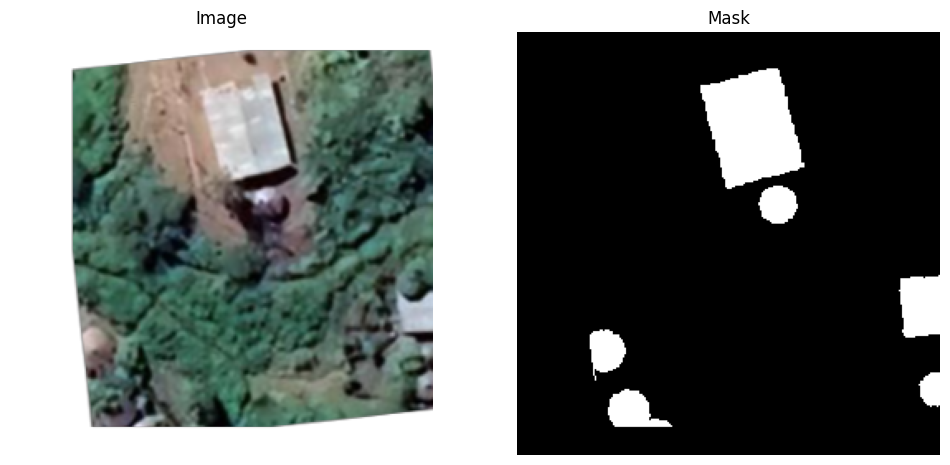

In [ ]:
# Select a random index
index = np.random.randint(0, len(X_train))

# Print the shape and data type of the selected image and mask
print("X_train[", index, "] shape:", X_train[index].shape)
print("X_train[", index, "] data type:", X_train[index].dtype)
print("y_train[", index, "] shape:", y_train[index].shape)
print("y_train[", index, "] data type:", y_train[index].dtype)

# Visualize the selected image and mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X_train[index])
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(y_train[index].squeeze(), cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

The following code snippet performs the following actions:

    Import Libraries:
        matplotlib.pyplot (imported as plt) for creating visualizations.
        numpy (imported as np) for working with numerical data.

    Select a Random Image:
        It retrieves a random index from the X_train dataset using np.random.randint. This index points to a specific image within the training data.

    Print Information:
        The code then prints the shape (dimensions) and data type of the selected image (X_train[index]) and its corresponding mask (y_train[index]).

    Visualize Image and Mask:
        It creates a figure with a specific size using plt.figure.
        The figure is divided into a grid with one row and two columns using plt.subplot.
        In the first subplot, it displays the selected image (X_train[index]) using plt.imshow.
        A title "Image" is added, and axes are turned off using plt.title and plt.axis('off').
        Similarly, in the second subplot, the mask (y_train[index]) is visualized after converting it to a grayscale image using cmap='gray'.
        Another title "Mask" is set, and axes are again turned off.
        Finally, the generated figure with both image and mask visualizations is displayed using plt.show.

In summary, this code snippet randomly selects an image and its corresponding mask from the training dataset, prints their information, and then visualizes both the image and the mask in a single figure.


X_train[ 3207 ] shape: (256, 256, 4)
X_train[ 3207 ] data type: float32
y_train[ 3207 ] shape: (256, 256, 1)
y_train[ 3207 ] data type: uint8


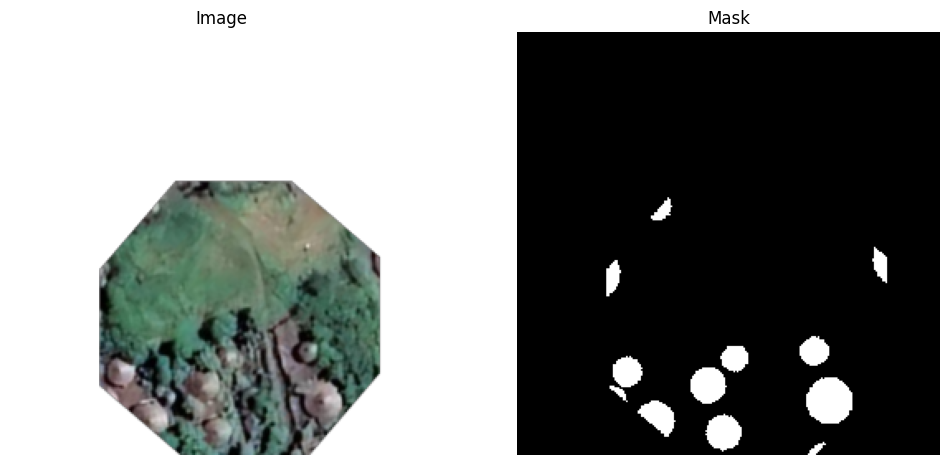

In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt
import numpy as np


# Select a random index
index = np.random.randint(0, len(X_train))

# Print the shape and data type of the selected image and mask
print("X_train[", index, "] shape:", X_train[index].shape)
print("X_train[", index, "] data type:", X_train[index].dtype)
print("y_train[", index, "] shape:", y_train[index].shape)
print("y_train[", index, "] data type:", y_train[index].dtype)

# Visualize the selected image and mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X_train[index])
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(y_train[index].squeeze(), cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

The code snippet visualizes a random image and its corresponding mask from two datasets, likely for image segmentation tasks. Here's a breakdown:

    Import Libraries:
        matplotlib.pyplot (imported as plt) is used for creating visualizations.
        numpy (imported as np) is used for numerical operations on data arrays.

    Select a Random Image:
        index = np.random.randint(0, len(X_train)) chooses a random integer between 0 (inclusive) and the length of X_train (exclusive) to pick a random image index.

    Print Information:
        The code prints the shapes and data types of the chosen image (X_train[index]) and its corresponding mask (y_train[index]). This helps understand the data structure.

    Visualization:
        plt.figure(figsize=(12, 6)) creates a figure with a specific size for visualization.
        plt.subplot(1, 2, 1) creates a subplot layout with 1 row and 2 columns, placing the image in the first position.
        Image visualization:
            X_train[index][:3].transpose(1, 2, 0) selects the first 3 channels (assuming RGB) from the chosen image, then transposes the order to (height, width, channels) for proper RGB image display with plt.imshow.
            plt.title("Image") adds a title "Image" to the subplot.
            plt.axis('off') hides the axis labels and ticks for a cleaner visualization.
        plt.subplot(1, 2, 2) creates a subplot in the second position for the mask.
        Mask visualization:
            plt.imshow(y_train[index].squeeze(), cmap='gray') displays the mask using imshow, converting it to a 2D array with squeeze() and using the grayscale colormap (cmap='gray').
            plt.title("Mask") adds a title "Mask" to the subplot.
            plt.axis('off') hides the axis labels and ticks.
        Finally, plt.show() displays the generated figure with the image and mask side-by-side.

In summary, this code allows you to visually inspect a random image and its corresponding mask from your datasets, providing insights into the data and potentially helping with tasks like image segmentation.


X_train[ 24 ] shape: (256, 256, 4)
X_train[ 24 ] data type: float32
y_train[ 24 ] shape: (256, 256, 1)
y_train[ 24 ] data type: uint8


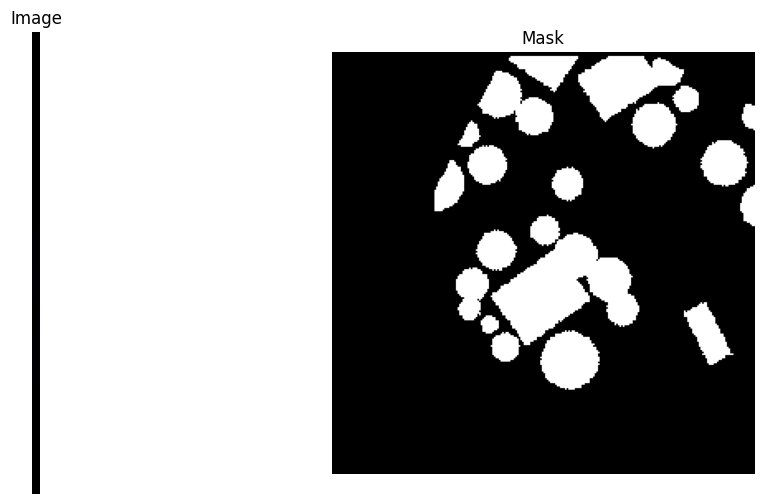

In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt
import numpy as np


# Select a random index
index = np.random.randint(0, len(X_train))

# Print the shape and data type of the selected image and mask
print("X_train[", index, "] shape:", X_train[index].shape)
print("X_train[", index, "] data type:", X_train[index].dtype)
print("y_train[", index, "] shape:", y_train[index].shape)
print("y_train[", index, "] data type:", y_train[index].dtype)

# Visualize the selected image and mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Assuming the first 3 channels represent RGB, select them
plt.imshow(X_train[index][:3].transpose(1, 2, 0))  # Transpose to (256, 256, 3) for RGB
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(y_train[index].squeeze(), cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

X_train[ 3439 ] shape: (256, 256, 4)
X_train[ 3439 ] data type: float32
y_train[ 3439 ] shape: (256, 256, 1)
y_train[ 3439 ] data type: uint8


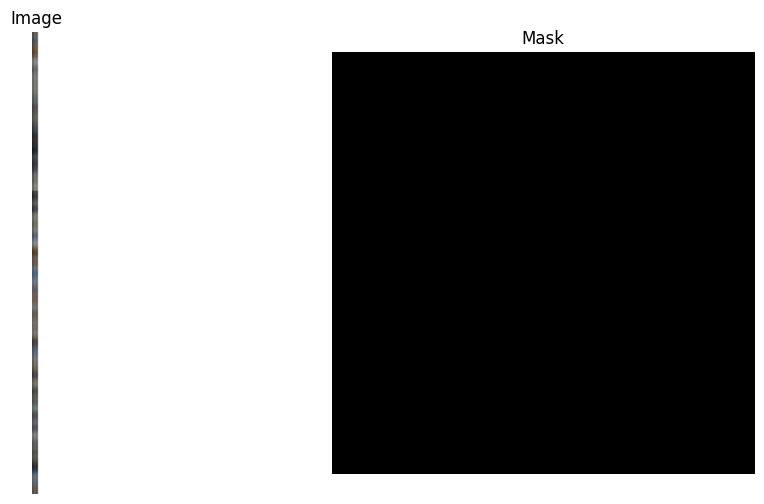

In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt
import numpy as np


# Select a random index
index = np.random.randint(0, len(X_train))

# Print the shape and data type of the selected image and mask
print("X_train[", index, "] shape:", X_train[index].shape)
print("X_train[", index, "] data type:", X_train[index].dtype)
print("y_train[", index, "] shape:", y_train[index].shape)
print("y_train[", index, "] data type:", y_train[index].dtype)

# Visualize the selected image and mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Assuming the first 3 dimensions of X_train represent RGB channels,
# select them for display using slicing
plt.imshow(X_train[index][:3, :, :].transpose(1, 2, 0))
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(y_train[index].squeeze(), cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

The code visualizes six channels from a training dataset, representing an image with multiple channels. Here's a breakdown:

    Import: It starts by importing matplotlib.pyplot as plt, a library commonly used for plotting in Python.

    Extracting Channels:
        It assumes X_train and y_train are 3D arrays representing image data (likely with height, width, and channel dimensions).
        It extracts individual channels from the 300th image (index 299) of X_train and stores them in variables channel_1 to channel_4.
        It also extracts channels from the 300th image of y_train and stores them in channel_5 and channel_6. There might be a mistake in indexing y_train though (refer to point 4).

    Creating Subplots:
        It uses plt.subplots(3, 2, figsize=(10, 10)) to create a figure with a grid of 3 rows and 2 columns (6 subplots in total) with a specific size of 10x10.

    Plotting Channels:
        It iterates through each subplot using indexing:
            axes[row, col].imshow(channel, cmap='gray') displays an image on the specified subplot (row, col) using the imshow function.
            The cmap='gray' argument specifies a grayscale colormap for the image.
        It sets titles for each subplot using axes[row, col].set_title('Channel X') where X is the channel number.

    Possible Mistake:
        The code seems to have a mistake in accessing channels from y_train.
            It uses the same value (0) for both red, green, and blue channels in channel_5 and channel_6.
            You might want to verify how y_train is structured and adjust indexing accordingly.

    Final Touches:
        plt.tight_layout() adjusts the spacing between subplots for better readability.
        plt.show() displays the created figure with all the subplots.

Overall, this code helps visualize different channels from a training image, for understanding the data or debugging purposes.


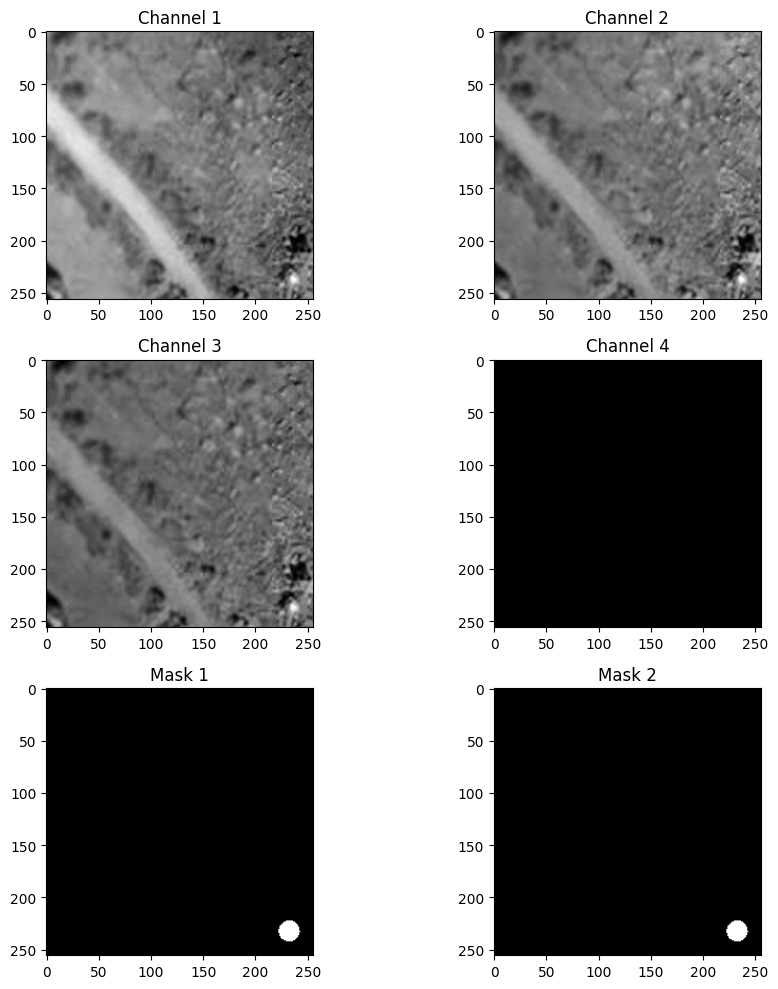

In [ ]:
import matplotlib.pyplot as plt

# Get the individual channels
channel_1 = X_train[300][:, :, 0]
channel_2 = X_train[300][:, :, 1]
channel_3 = X_train[300][:, :, 2]
channel_4 = X_train[300][:, :, 3]
channel_5 = y_train[300][:, :, 0]
channel_6 = y_train[300][:, :, 0]

# Create a figure with 4 subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Plot each channel
axes[0, 0].imshow(channel_1, cmap='gray')
axes[0, 0].set_title('Channel 1')
axes[0, 1].imshow(channel_2, cmap='gray')
axes[0, 1].set_title('Channel 2')
axes[1, 0].imshow(channel_3, cmap='gray')
axes[1, 0].set_title('Channel 3')
axes[1, 1].imshow(channel_4, cmap='gray')
axes[1, 1].set_title('Channel 4')
axes[2, 0].imshow(channel_5, cmap='gray') # Changed index from (2, 2) to (2, 0)
axes[2, 0].set_title('Mask 1') # Changed title
axes[2, 1].imshow(channel_6, cmap='gray') # Changed index from (0, 2) to (2, 1)
axes[2, 1].set_title('Mask 2') # Changed title


plt.tight_layout()
plt.show()

# Remove Unecessary Channel

Code Summary:

The provided code snippet focuses on data preprocessing, specifically on reducing the number of color channels in image data. Here's a breakdown:

1. Channel Reduction:

    X_train = X_train[:, :, :, :3]: This line slices the X_train tensor, keeping only the first three color channels. This is common when working with RGB images, as it reduces the dimensionality of the data.
    X_test = X_test[:, :, :, :3]: Similarly, this line applies the same channel reduction to the X_test tensor.

2. Shape Verification:

    The subsequent print statements display the shapes of the X_train, y_train, X_test, and y_test tensors. This is useful for verifying the data dimensions and ensuring that the channel reduction was successful.

In essence, the code prepares the image data for further processing or model training by selecting a subset of color channels. This can be beneficial for reducing computational cost and improving model performance, especially when dealing with large datasets or complex models.

In [ ]:
# Assuming you want to keep the first 3 channels
X_train = X_train[:, :, :, :3]
X_test = X_test[:, :, :, :3]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3968, 256, 256, 3)
y_train shape: (3968, 256, 256, 1)
X_test shape: (1610, 256, 256, 3)
y_test shape: (1610, 256, 256, 1)


# Model Architecture

# UNET

Code Summary: Implementing a U-Net Model

The provided Python code defines a function to create a U-Net model, a popular architecture for image segmentation tasks, particularly in medical image analysis.

Breakdown of the Code:

    Import Necessary Layers:
        Imports essential layers from TensorFlow's Keras library:
            Input: Defines the input layer.
            Conv2D: Performs 2D convolution.
            MaxPooling2D: Downsamples the feature maps.
            UpSampling2D: Upsamples the feature maps.
            Concatenate: Merges feature maps from different levels.
            BatchNormalization: Normalizes the activations.
            Activation: Applies activation functions (ReLU in this case).

    Define the U-Net Architecture:
        Encoder (Downward Path):
            A series of convolutional layers and max pooling layers progressively reduce the spatial dimensions of the input image while increasing the number of feature channels.
        Bottleneck Layer:
            A couple of convolutional layers process the smallest feature maps.
        Decoder (Upward Path):
            A series of upsampling layers and convolutional layers gradually increase the spatial dimensions while concatenating feature maps from the corresponding encoder layers.
        Output Layer:
            A final 1x1 convolutional layer with a sigmoid activation function produces the segmentation mask.

Key Points:

    Convolutional Layers: Extract features from the input image.
    Max Pooling Layers: Downsample the feature maps to reduce computational cost and introduce spatial invariance.
    Upsampling Layers: Increase the spatial dimensions of the feature maps.
    Concatenation: Merges feature maps from different levels to provide contextual information.
    Activation Function: Introduces non-linearity to the network.
    Output Layer: Produces a probability map for each pixel, indicating the likelihood of belonging to a specific class (e.g., foreground or background).

In essence, the U-Net architecture effectively captures both local and global features of the input image, making it well-suited for tasks like image segmentation.

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Activation

def unet(input_shape):
    inputs = Input(input_shape)

    # Downward path (encoder)
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottom layer
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding='same')(conv5)

    # Upward path (decoder)
    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = Concatenate()([up6, conv4])
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = Concatenate()([up7, conv3])
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = Concatenate()([up8, conv2])
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = Concatenate()([up9, conv1])
    conv9 = Conv2D(32, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, 3, activation='relu', padding='same')(conv9)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

# Model Training

The code  defines and trains a U-Net model for image segmentation using TensorFlow. Here's a breakdown of what each part does:

1. Importing TensorFlow:

    import tensorflow as tf: This line imports the TensorFlow library and assigns it the alias tf for easier use in the code. TensorFlow is a popular framework for building and training machine learning models.

2. Defining the U-Net Model:

    model = unet(input_shape=(256, 256, 3)): This line assumes a function named unet exists elsewhere in the code. This function likely defines the architecture of the U-Net model. The provided arguments specify the input shape of the images the model will be trained on. In this case, the images are 256 pixels wide, 256 pixels high, and have 3 channels (likely RGB).

3. Compiling the Model:

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): This line configures the model for training. Here's what each argument does:
        optimizer='adam': This specifies the optimization algorithm used to train the model. Adam is a popular choice for its efficiency.
        loss='binary_crossentropy': This defines the loss function used to measure how well the model performs during training. Binary crossentropy is commonly used for binary classification problems (where each pixel is classified as either foreground or background).
        metrics=['accuracy']: This tells the model to track the accuracy metric during training, which helps evaluate how often the model makes correct predictions.

4. Training the Model:

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)): This line trains the U-Net model on the provided data. Here's what each argument does:
        X_train: This is a NumPy array containing the training images.
        y_train: This is a NumPy array containing the corresponding ground truth labels for the training images (e.g., indicating which pixels belong to which object).
        epochs=20: This specifies the number of times the entire training dataset will be passed through the model for training.
        batch_size=32: This defines the number of images processed by the model at a time during training.
        validation_data=(X_test, y_test): This provides a separate validation dataset (X_test and y_test) for evaluating the model's performance during training. The model will not be trained on this data, but will be used to assess how well it generalizes to unseen data.
    The line assigns the training history to the variable history. This history object likely contains information about the training process, such as the loss and accuracy values over each epoch.

In summary, this code defines a U-Net model for image segmentation, configures it for training, and then trains it on a provided dataset.


In [ ]:
import tensorflow as tf

In [ ]:
model = unet(input_shape=(256, 256, 3))

In [ ]:
# Assuming you've defined your model (e.g., `model = unet(input_shape)`)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 170s 900ms/step - accuracy: 0.9432 - loss: 0.2476 - val_accuracy: 0.9776 - val_loss: 0.0391
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 626ms/step - accuracy: 0.9846 - loss: 0.0337 - val_accuracy: 0.9879 - val_loss: 0.0275
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 626ms/step - accuracy: 0.9884 - loss: 0.0274 - val_accuracy: 0.9898 - val_loss: 0.0272
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 626ms/step - accuracy: 0.9911 - loss: 0.0216 - val_accuracy: 0.9922 - val_loss: 0.0209
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 626ms/step - accuracy: 0.9913 - loss: 0.0212 - val_accuracy: 0.9915 - val_loss: 0.0212
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 626ms/step - accuracy: 0.9923 - loss: 0.0189 - val_accuracy: 0.9921 - val_loss: 0.0204
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 628ms/step - accuracy: 0.9933 - loss: 0.0167 - val_accuracy: 0.9924 - val_loss: 0.0198
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 78s 626ms/step - accuracy: 0.9936 - loss: 

The code snippet is saving the results of training a machine learning model. Here's a breakdown:

    Saving the Model:
        model.save('best_model.h5'): This line saves the trained model itself to a file named best_model.h5. The .h5 extension indicates it's saved in the HDF5 format, commonly used for deep learning models.

    Extracting Training Metrics:
        This section retrieves key performance metrics from the training process. It assumes a variable history exists that stores this information.
            history.history['loss']: Extracts training loss values.
            Similar lines extract training accuracy, validation loss, and validation accuracy.

    Saving Training History:
        A dictionary named training_history is created. It stores the extracted metrics like training loss, training accuracy, etc.
        with open('training_history.json', 'w') as file: : This line opens a file named training_history.json in write mode ('w').
        json.dump(training_history, file, indent=4): This saves the training_history dictionary as a JSON file. The indent=4 argument makes the JSON file more readable with proper indentation.

In summary, this code saves both the trained model and its training performance metrics for later use or analysis.

In [ ]:
# Save the trained model
model.save('best_model.h5')

In [ ]:
import json



# Extract and save key metrics
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

training_history = {'train_loss': train_loss, 'train_acc': train_acc,
                   'val_loss': val_loss, 'val_acc': val_acc}

# Save the dictionary as a JSON file
with open('training_history.json', 'w') as file:
    json.dump(training_history, file, indent=4)

**UPLOAD SAVED MODEL**

In [ ]:
# prompt: to use the saved model for further use: # Save the trained model
# model.save('best_model2.h5')

from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_model.h5')

# Now you can use the loaded_model for predictions or further training
# For example, to make predictions on new data:
# predictions = loaded_model.predict(new_data)

This code visualizes the training process of a machine learning model. Here's a breakdown of what it does:

    Load Training Data:
        Imports the json library to work with JSON files.
        Opens a file named "training_history.json" for reading.
        Loads the content of the file as a Python dictionary using json.load. This dictionary likely contains information about the training process, including metrics like loss and accuracy.

    Extract Metrics:
        Extracts specific values from the loaded dictionary:
            train_loss: Training loss values over training epochs.
            train_acc: Training accuracy values over training epochs.
            val_loss: Validation loss values over training epochs.
            val_acc: Validation accuracy values over training epochs.

    Plot the Results:
        Imports matplotlib.pyplot for plotting functionalities (referred to as plt for brevity).
        Creates two line plots:
            One for training loss (train_loss) with label "Train Loss".
            Another for validation loss (val_loss) with label "Validation Loss".
        Sets labels for the x-axis (Epoch) and y-axis (Loss).
        Adds a legend to distinguish the lines.
        Displays the generated plot using plt.show().

In essence, this code takes the training history stored in a JSON file and visualizes the training and validation loss curves over training epochs. This helps analyze the model's performance during training and identify any potential issues like overfitting.



In [ ]:
import json

# Load the JSON file
with open('training_history.json', 'r') as file:
    training_history = json.load(file)

# Extract the metrics
train_loss = training_history['train_loss']
train_acc = training_history['train_acc']
val_loss = training_history['val_loss']
val_acc = training_history['val_acc']

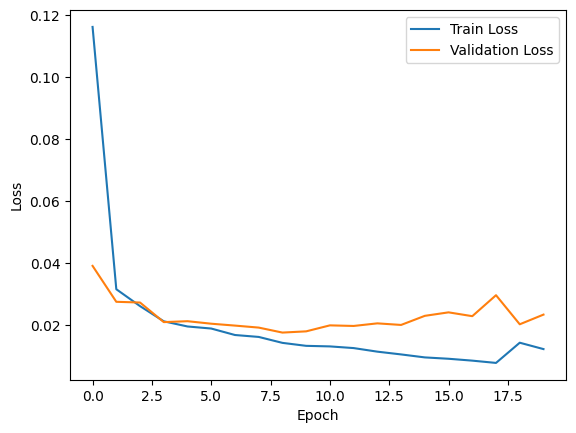

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

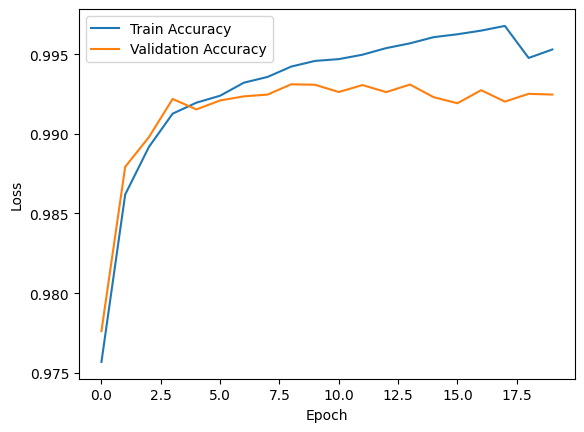

In [ ]:
# Plot the training and validation loss
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation

Visualizing Training History

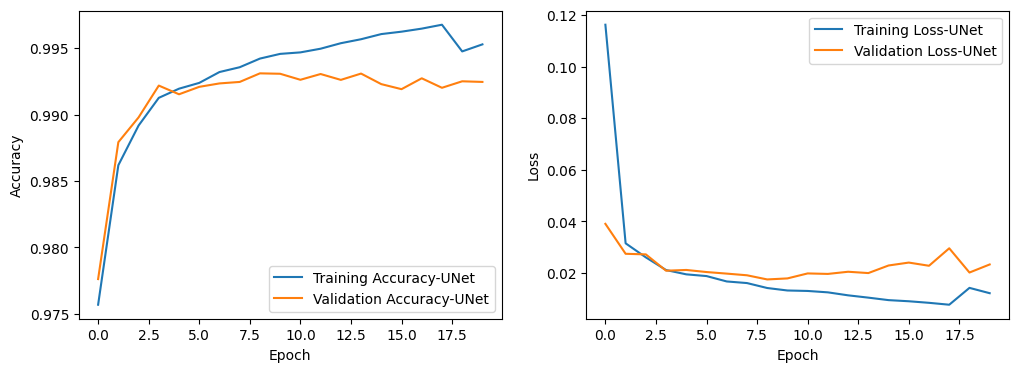

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy-UNet')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy-UNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss-UNet')
plt.plot(history.history['val_loss'], label='Validation Loss-UNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Making Predictions on Test Data

Code Breakdown:

Import:

    import matplotlib.pyplot as plt: This line imports the matplotlib.pyplot module and assigns it the alias plt. This module 1 is used for creating visualizations, such as plots and charts.   

1. www.numerade.com

    www.numerade.com

Prediction:

    y_pred = model.predict(X_test): This line makes predictions on the X_test dataset using the trained machine learning model model. The predicted values are stored in the y_pred variable.

Thresholding:

    y_pred = (y_pred > 0.5).astype(np.uint8): This line applies a threshold of 0.5 to the predicted probabilities in y_pred. If a predicted probability is greater than 0.5, it's classified as 1 (positive class); otherwise, it's classified as 0 (negative class). The astype(np.uint8) part converts the boolean values (True/False) to integer values (1/0).

Overall Purpose:

The code snippet is performing binary classification. It first uses a trained model to predict probabilities for the test data. Then, it applies a threshold of 0.5 to convert these probabilities into binary predictions (0 or 1). This is a common technique in binary classification tasks, where the model outputs probabilities, and a threshold is used to make a definitive decision.

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(np.uint8)  # Thresholding to obtain binary predictions



51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 292ms/step


Skipping plotting for i=1 as it would result in an index error.
Skipping plotting for i=2 as it would result in an index error.
Skipping plotting for i=4 as it would result in an index error.


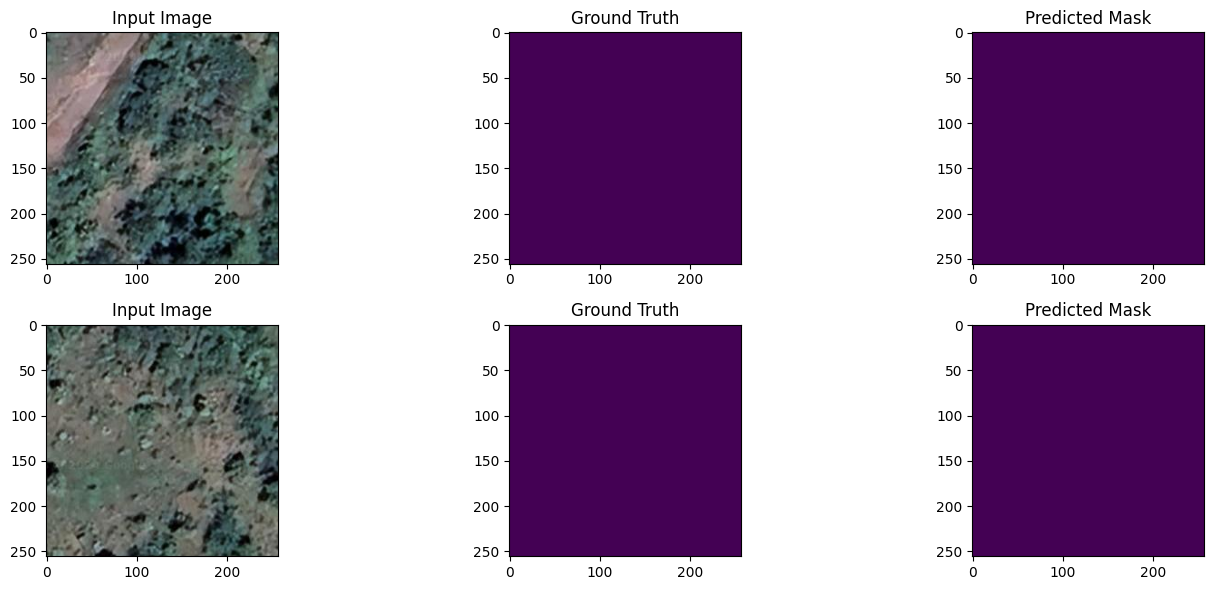

In [ ]:
# Visualize predictions and ground truth
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 6)) # Changed ncols to 3
for i in range(5): # Changed range to 5 as there are 5 images and corresponding items to plot
    row = i // 3  # Calculate row index using ncols
    col = i % 3  # Calculate column index using ncols

    # Check if the calculated column index is within bounds
    if col + 2 < ax.shape[1]:
        ax[row, col].imshow(X_test[i])
        ax[row, col].set_title('Input Image')

        ax[row, col + 1].imshow(y_test[i])
        ax[row, col + 1].set_title('Ground Truth')

        ax[row, col + 2].imshow(y_pred[i])
        ax[row, col + 2].set_title('Predicted Mask')
    else:
        # Handle cases where column index is out of bounds
        print(f"Skipping plotting for i={i} as it would result in an index error.")

plt.tight_layout()  # To avoid overlapping of subplots
plt.show()

The code visualizes a random sample from a test dataset used for evaluating an image segmentation model. Here's a breakdown:

    Imports:
        matplotlib.pyplot is imported as plt for creating plots.
        numpy is imported as np for numerical operations.

    Assumptions:
        The code assumes you already have a trained image segmentation model and loaded test data (images and their corresponding ground truth masks).

    Function Definition:
        visualize_random_sample(model, X_test, y_test): This function takes the model, test images (X_test), and ground truth labels (y_test) as input.

    Selecting a Random Sample:
        random_index = np.random.randint(0, len(X_test)): It generates a random integer within the range of the test data length to pick a random image index.

    Extracting Image and Ground Truth:
        image = X_test[random_index]: It retrieves the image at the chosen random index from the test data.
        ground_truth = y_test[random_index]: It retrieves the corresponding ground truth label (mask) for that image.

    Making a Prediction:
        prediction = model.predict(np.expand_dims(image, axis=0))[0]: The function uses the model to predict a segmentation mask for the chosen image.
            np.expand_dims(image, axis=0): This line likely reformats the image data into a specific format expected by the model for prediction (typically adding a new dimension for a batch of one image).
            [0]: This extracts the first element from the prediction output, assuming the model returns a single prediction.

    Plotting the Results:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5)): It creates a figure with a single row of 3 subplots for displaying the image, ground truth, and prediction side-by-side.
        ax[0].imshow(image), ax[0].set_title(...): This displays the original image in the first subplot with the title "Input Image".
        ax[1].imshow(ground_truth), ax[1].set_title(...): This displays the ground truth mask in the second subplot with the title "Ground Truth".
        ax[2].imshow(prediction), ax[2].set_title(...): This displays the predicted mask in the third subplot with the title "Predicted Mask".
        plt.show(): This displays the generated figure with all three images.

    Calling the Function:
        visualize_random_sample(model, X_test, y_test): This line calls the function with your model and test data to visualize a random sample and its corresponding prediction.

In essence, this code helps you visually compare the model's performance on a randomly chosen image from the test data by displaying the original image, the expected ground truth mask, and the mask predicted by the model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


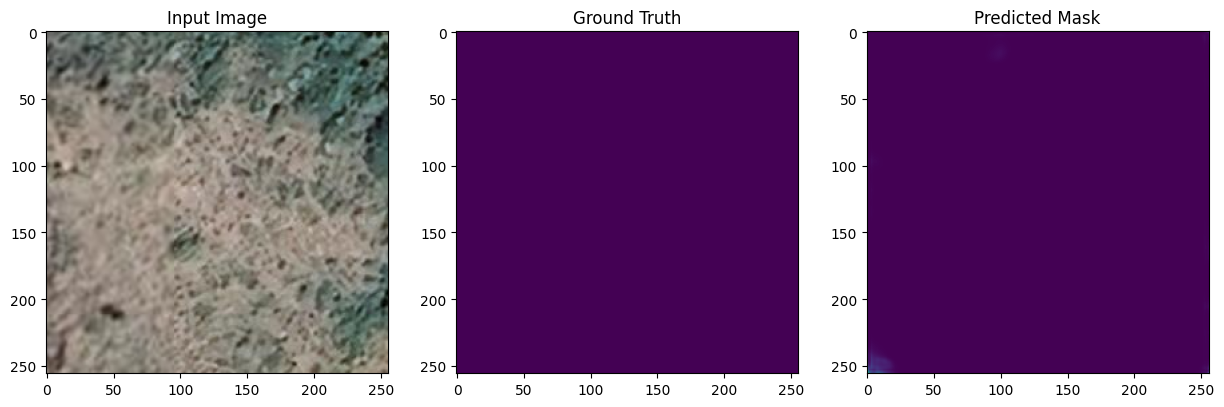

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model and a dataset loaded

# Function to visualize a random sample
def visualize_random_sample(model, X_test, y_test):
  # Select a random index
  random_index = np.random.randint(0, len(X_test))

  # Get the image and its ground truth
  image = X_test[random_index]
  ground_truth = y_test[random_index]

  # Make a prediction
  prediction = model.predict(np.expand_dims(image, axis=0))[0]

  # Plot the image, ground truth, and prediction
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  ax[0].imshow(image)
  ax[0].set_title('Input Image')

  ax[1].imshow(ground_truth)
  ax[1].set_title('Ground Truth')

  ax[2].imshow(prediction)
  ax[2].set_title('Predicted Mask')

  plt.show()

# Call the function to visualize a random sample
visualize_random_sample(model, X_test, y_test)

The code defines a function called

visualize_sample that allows you to visualize a specific image and its corresponding prediction from a dataset. Here's a breakdown:

Imports:

    matplotlib.pyplot (imported as plt) is used for creating plots.
    numpy (imported as np) is used for numerical operations.

Function Definition:

    visualize_sample(model, X_test, y_test, i): This function takes four arguments:
        model: The trained model used for making predictions.
        X_test: The testing data containing images (assumed to be a NumPy array).
        y_test: The ground truth labels for the testing data (assumed to be a NumPy array).
        i: The index of the specific sample to visualize from the dataset.
    The function checks if the provided index is within the valid range of the dataset. It raises an error if the index is out of bounds.
    It then retrieves the image and its corresponding ground truth label based on the provided index.
    The function uses the model to make a prediction on the image.
    Finally, it creates a plot with three subplots:
        Subplot 1: Displays the original input image.
        Subplot 2: Displays the ground truth label (likely a mask).
        Subplot 3: Displays the predicted mask generated by the model.
    The function uses plt.show() to display the generated plot.

Sample Visualization:

    The code defines a variable i with a value of 489 (you can change this to any valid index in your dataset).
    It calls the visualize_sample function with the trained model, testing data, ground truth labels, and the chosen index i. This allows you to visually compare the original image, the ground truth label, and the model's prediction for that specific sample.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


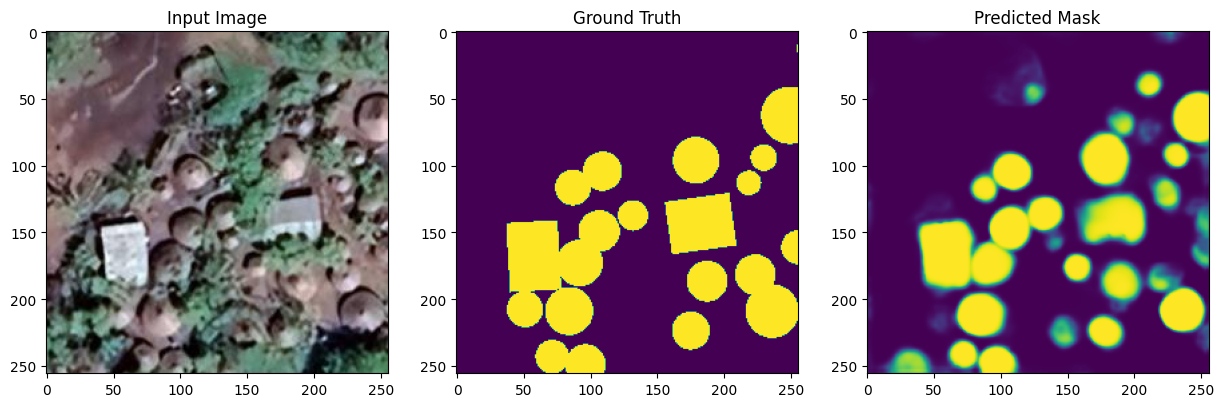

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model and a dataset loaded

# Function to visualize a specific sample
def visualize_sample(model, X_test, y_test, i):
  """Visualizes a specific sample (identified by index) from the dataset.

  Args:
      model: The trained model for prediction.
      X_test: The testing data containing images.
      y_test: The ground truth masks for the testing data.
      i: The index of the specific sample to visualize.

  Raises:
      IndexError: If the provided index is out of range.
  """

  if i < 0 or i >= len(X_test):
    raise IndexError("Invalid index. Please provide a valid index within the dataset range.")

  # Get the image and its ground truth
  image = X_test[i]
  ground_truth = y_test[i]

  # Make a prediction
  prediction = model.predict(np.expand_dims(image, axis=0))[0]

  # Plot the image, ground truth, and prediction
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  ax[0].imshow(image)
  ax[0].set_title('Input Image')

  ax[1].imshow(ground_truth)
  ax[1].set_title('Ground Truth')

  ax[2].imshow(prediction)
  ax[2].set_title('Predicted Mask')

  plt.show()

# Specify the index of the sample you want to visualize
i = 489  # Change this to the desired index

# Call the function to visualize the specified sample
visualize_sample(model, X_test, y_test, i)

**Merge the predicted Mask**

# Evaluating Model Performance

Code Summary:

The provided code snippets are used to evaluate the performance of a machine learning model, specifically for classification tasks. Here's a breakdown of what each part does:

Part 1: Traditional Classification Metrics

    Import Metrics: Imports necessary metrics from the sklearn.metrics module.
    Calculate Metrics:
        Accuracy: Measures the proportion of correct predictions.
        Precision: Measures the proportion of positive predictions that are actually positive.
        Recall: Measures the proportion of actual positive cases that are correctly identified.
        F1-Score: A harmonic mean of precision and recall, balancing both metrics.
    Print Results: Prints the calculated values of accuracy, precision, recall, and F1-score.

Part 2: Intersection over Union (IoU)

    Import TensorFlow: Imports the TensorFlow library for numerical computation.
    Create IoU Metric: Creates an instance of the MeanIoU metric from TensorFlow's Keras library. The num_classes parameter specifies the number of classes in the classification problem.
    Update State: Updates the metric's state with the ground truth labels (y_test) and predicted labels (y_pred).
    Calculate IoU: Computes the final IoU value using the result() method.
    Print IoU: Prints the calculated IoU value.

Overall Purpose:

The code evaluates the performance of a classification model using both traditional metrics (accuracy, precision, recall, F1-score) and a more specific metric for segmentation tasks, the Intersection over Union (IoU). These metrics provide insights into the model's ability to correctly classify instances and identify the correct boundaries between different classes in segmentation tasks.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test.flatten(), y_pred.flatten())
precision = precision_score(y_test.flatten(), y_pred.flatten())
recall = recall_score(y_test.flatten(), y_pred.flatten())
f1 = f1_score(y_test.flatten(), y_pred.flatten())

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9924659112965839
Precision: 0.8530839561453792
Recall: 0.8014562802615512
F1-Score: 0.8264646325288002


In [ ]:
import tensorflow as tf

# ... other code ...

# Calculate IoU using TensorFlow
iou = tf.keras.metrics.MeanIoU(num_classes=2)  # Adjust num_classes as needed
iou.update_state(y_true=y_test, y_pred=y_pred)
iou_value = iou.result().numpy()

print("IoU:", iou_value)

IoU: 0.8295066


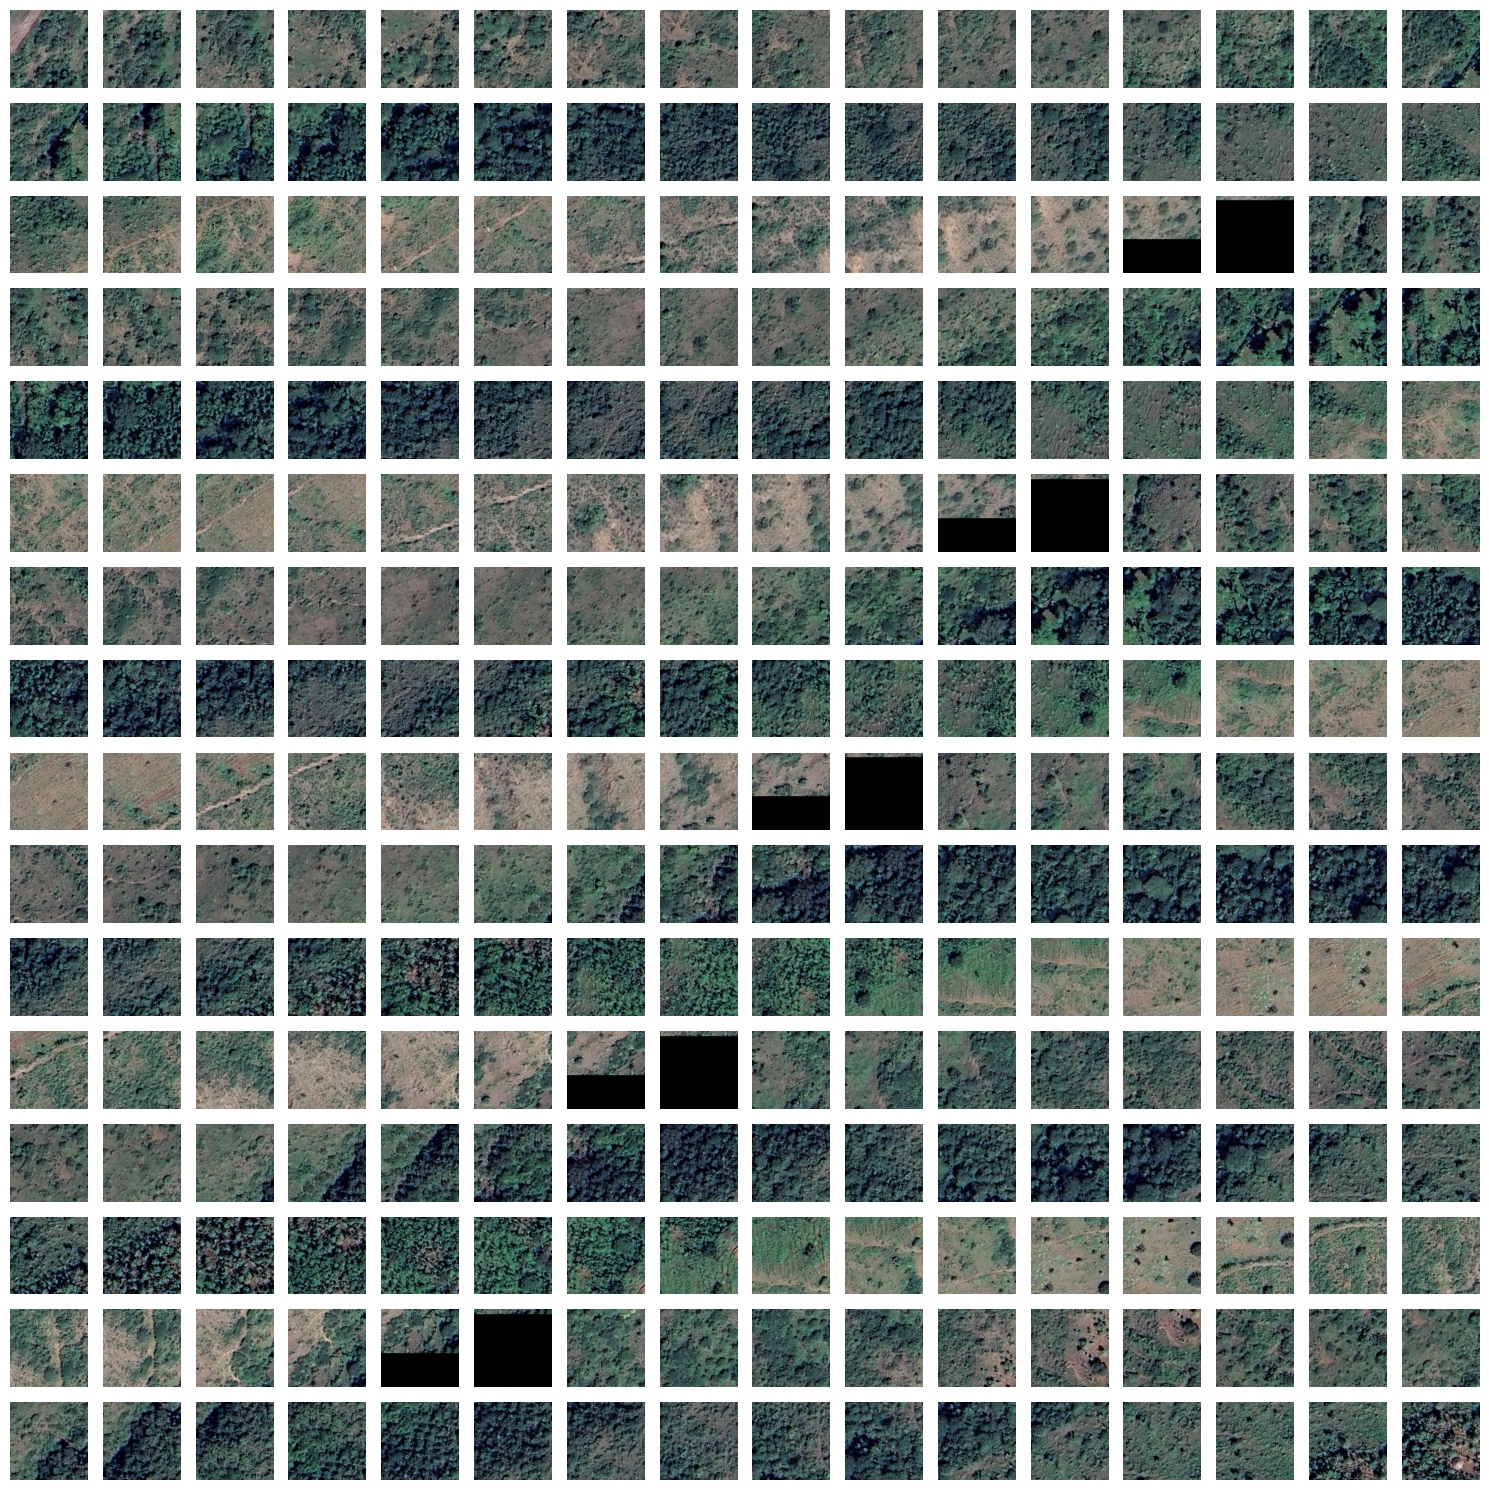

In [ ]:
# prompt: mosaic (y_pred.shape) 16 by 16

def mosaic(y_pred_shape2, rows=16, cols=16):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            if index < y_pred_shape2[0]:
                axes[i, j].imshow(X_test[index])
                axes[i, j].axis('off')
            else:
                axes[i,j].axis('off')
    plt.tight_layout()
    plt.show()
mosaic(X_test.shape)

In [ ]:
import numpy as np

# Assuming y_train is a 4D array (batch_size, height, width, 1)
def count_pixels(y_train):
  """Counts the number of pixels for background and label in the training data.

  Args:
    y_train: The ground truth segmentation masks.

  Returns:
    A tuple containing the number of background and label pixels.
  """

  # Flatten the 4D array into a 2D array
  y_train_flat = y_train.reshape(-1)

  # Count the number of pixels for each class
  num_background_pixels = np.sum(y_train_flat == 0)
  num_label_pixels = np.sum(y_train_flat == 1)

  return num_background_pixels, num_label_pixels

# Example usage:
num_background, num_label = count_pixels(y_train)
print("Number of background pixels:", num_background)
print("Number of label pixels:", num_label)

Number of background pixels: 26541427
Number of label pixels: 590477


TEST


In [ ]:
import numpy as np

# Assuming y_test is a 4D array (batch_size, height, width, 1)
def count_pixels_test(y_test):
  """Counts the number of pixels for background and label in the test data.

  Args:
    y_test: The ground truth segmentation masks for the test data.

  Returns:
    A tuple containing the number of background and label pixels.
  """

  # Flatten the 4D array into a 2D array
  y_test_flat = y_test.reshape(-1)

  # Count the number of pixels for each class
  num_background_pixels_test = np.sum(y_test_flat == 0)
  num_label_pixels_test = np.sum(y_test_flat == 1)

  return num_background_pixels_test, num_label_pixels_test

# Example usage:
num_background_test, num_label_test = count_pixels_test(y_test)
print("Number of background pixels in test data:", num_background_test)
print("Number of label pixels in test data:", num_label_test)

Number of background pixels in test data: 103151052
Number of label pixels in test data: 2361908


**Predict on XXX**

First Preprocessing the data on which prediction is to made

In [ ]:
# Define data paths
data_dir = "/content/drive/MyDrive/konso_unet4"
train_data_dir = os.path.join(data_dir, "testing")
test_data_dir = os.path.join(data_dir, "training")

# Load training and testing data (replace with actual loading logic if npy files are not used)
XX_train = np.load(os.path.join(train_data_dir, "XX_train.npy"))
yy_train = np.load(os.path.join(train_data_dir, "yy_train.npy"))
XX_test = np.load(os.path.join(test_data_dir, "XX_test.npy"))
yy_test = np.load(os.path.join(test_data_dir, "yy_test.npy"))

In [ ]:
print("XX_train shape:", XX_train.shape)
print("yy_train shape:", yy_train.shape)
print("XX_test shape:", XX_test.shape)
print("yy_test shape:", yy_test.shape)

XX_train shape: (414, 4, 256, 256)
yy_train shape: (414, 1, 256, 256)
XX_test shape: (256, 4, 256, 256)
yy_test shape: (256, 1, 256, 256)


In [ ]:
# prompt: for the shape of (256, 1, 256, 256), rearrenge them as (256, 256, 256, 1)

XX_train = np.transpose(XX_train, (0, 2, 3, 1))
print(XX_train.shape)
yy_train = np.transpose(yy_train, (0, 2, 3, 1))
print(yy_train.shape)

XX_test = np.transpose(XX_test, (0, 2, 3, 1))
print(XX_test.shape)
yy_test = np.transpose(yy_test, (0, 2, 3, 1))
print(yy_test.shape)

(414, 256, 256, 4)
(414, 256, 256, 1)
(256, 256, 256, 4)
(256, 256, 256, 1)


In [ ]:
# Assuming you want to keep the first 3 channels
XX_train = XX_train[:, :, :, :3]
XX_test = XX_test[:, :, :, :3]

In [ ]:
print("XX_train shape:", XX_train.shape)
print("yy_train shape:", yy_train.shape)
print("XX_test shape:", XX_test.shape)
print("yy_test shape:", yy_test.shape)

XX_train shape: (414, 256, 256, 3)
yy_train shape: (414, 256, 256, 1)
XX_test shape: (256, 256, 256, 3)
yy_test shape: (256, 256, 256, 1)


Code Breakdown:

1. Importing the Plotting Library:
Python

import matplotlib.pyplot as plt

Use code with caution.

This line imports the matplotlib.pyplot module, commonly abbreviated as plt. This module provides a wide range of functions for creating static, animated, and interactive visualizations.

2. Making Predictions on the Test Set:
Python

yy_pred = model.predict(XX_test)

Use code with caution.

This line uses a trained machine learning model (model) to make predictions on a test dataset (XX_test). The model.predict() function takes the test data as input and outputs the model's predicted values for each data point.

3. Thresholding Predictions:
Python

yy_pred = (yy_pred > 0.5).astype(np.uint8)

Use code with caution.

This line applies a thresholding operation to the predicted values:

    Comparison: It compares each predicted value to 0.5.
    Boolean Conversion: If the value is greater than 0.5, it's converted to True; otherwise, it's False.
    Integer Conversion: The boolean values are then converted to integers: True becomes 1, and False becomes 0. This step is often used for binary classification problems, where the model's output is a probability between 0 and 1. By setting a threshold of 0.5, the predictions are converted into binary classes (0 or 1).

Overall Purpose:

The code snippet is  part of a machine learning pipeline, specifically a classification task. It first makes predictions on a test set using a trained model and then converts the probabilistic predictions into binary class labels (0 or 1) using a thresholding technique. The resulting binary predictions can be used for further analysis, evaluation, or decision-making.


In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
yy_pred = model.predict(XX_test)
yy_pred = (yy_pred > 0.5).astype(np.uint8)  # Thresholding to obtain binary predictions



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


The code defines a function called

visualize_sample that allows you to visualize a specific sample from a dataset along with its ground truth and predicted mask. Here's a breakdown:

    Imports:
        matplotlib.pyplot is imported as plt for creating plots.
        numpy is imported as np for numerical operations.

    Assumptions:
        The code assumes you already have a trained model and a loaded dataset containing images and their corresponding ground truth masks.

    Function Definition:
        visualize_sample(model, XX_test, yy_test, i): This function takes four arguments:
            model: The trained model used for making predictions.
            XX_test: A NumPy array containing the test images.
            yy_test: A NumPy array containing the ground truth masks for the test images.
            i: The index of the specific sample you want to visualize.

    Error Handling:
        The function checks if the provided index i is within the valid range of the dataset (0 to length of XX_test - 1). If not, it raises an IndexError.

    Data Retrieval:
        It retrieves the image and its corresponding ground truth mask using the provided index i.

    Prediction:
        It uses the trained model (model) to predict a mask for the given image. This involves converting the image to a specific format (np.expand_dims) required by the model and then making the prediction.

    Visualization:
        It uses matplotlib.pyplot to create a figure with three subplots.
        The first subplot displays the original image with the title "Input Image."
        The second subplot displays the ground truth mask with the title "Ground Truth."
        The third subplot displays the predicted mask with the title "Predicted Mask."
        Finally, it uses plt.show() to display the generated plot.

    Sample Visualization:
        The code defines an index i = 88 (you can change this to the desired index).
        It calls the visualize_sample function with the trained model, test data (XX_test), test masks (yy_test), and the chosen index i. This will visualize the image, its ground truth mask, and the predicted mask for the specified sample.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


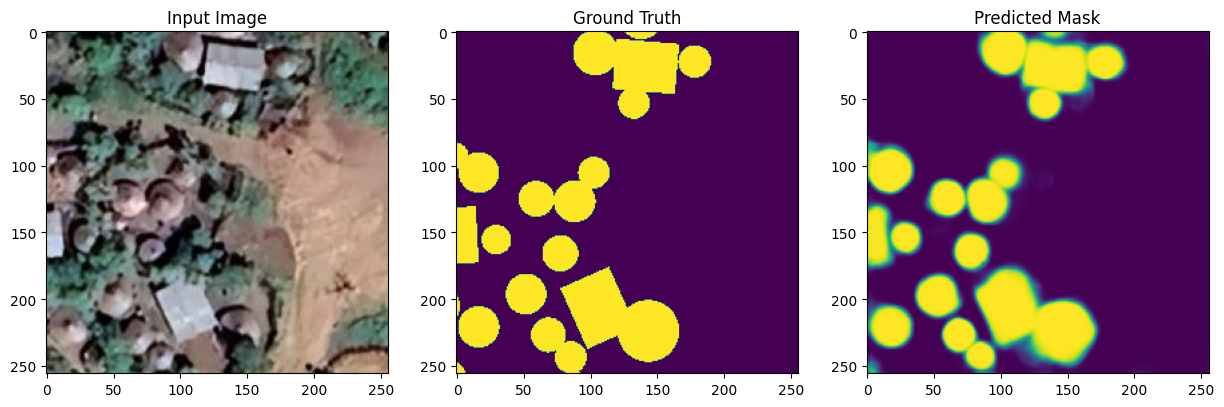

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model and a dataset loaded

# Function to visualize a specific sample
def visualize_sample(model, XX_test, yy_test, i):
  """Visualizes a specific sample (identified by index) from the dataset.

  Args:
      model: The trained model for prediction.
      X_test: The testing data containing images.
      y_test: The ground truth masks for the testing data.
      i: The index of the specific sample to visualize.

  Raises:
      IndexError: If the provided index is out of range.
  """

  if i < 0 or i >= len(XX_test):
    raise IndexError("Invalid index. Please provide a valid index within the dataset range.")

  # Get the image and its ground truth
  image = XX_test[i]
  ground_truth = yy_test[i]

  # Make a prediction
  prediction = model.predict(np.expand_dims(image, axis=0))[0]

  # Plot the image, ground truth, and prediction
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  ax[0].imshow(image)
  ax[0].set_title('Input Image')

  ax[1].imshow(ground_truth)
  ax[1].set_title('Ground Truth')

  ax[2].imshow(prediction)
  ax[2].set_title('Predicted Mask')

  plt.show()

# Specify the index of the sample you want to visualize
i = 88  # Change this to the desired index

# Call the function to visualize the specified sample
visualize_sample(model, XX_test, yy_test, i)

**Precict on TEST**

In [ ]:


# Define data paths
data_dir = "/content/drive/MyDrive/konso_unet4"
train_data_dir = os.path.join(data_dir, "testing")
test_data_dir = os.path.join(data_dir, "training")

# Load training and testing data (replace with actual loading logic if npy files are not used)
XX_train = np.load(os.path.join(train_data_dir, "XX_train.npy"))
yy_train = np.load(os.path.join(train_data_dir, "yy_train.npy"))
XX_test = np.load(os.path.join(test_data_dir, "XX_test.npy"))
yy_test = np.load(os.path.join(test_data_dir, "yy_test.npy"))

In [ ]:
print("XX_train shape:", XX_train.shape)
print("yy_train shape:", yy_train.shape)
print("XX_test shape:", XX_test.shape)
print("yy_test shape:", yy_test.shape)

XX_train shape: (414, 4, 256, 256)
yy_train shape: (414, 1, 256, 256)
XX_test shape: (256, 4, 256, 256)
yy_test shape: (256, 1, 256, 256)


In [ ]:
# prompt: for the shape of (256, 1, 256, 256), rearrenge them as (256, 256, 256, 1)

XX_train = np.transpose(XX_train, (0, 2, 3, 1))
print(XX_train.shape)
yy_train = np.transpose(yy_train, (0, 2, 3, 1))
print(yy_train.shape)

XX_test = np.transpose(XX_test, (0, 2, 3, 1))
print(XX_test.shape)
yy_test = np.transpose(yy_test, (0, 2, 3, 1))
print(yy_test.shape)

(414, 256, 256, 4)
(414, 256, 256, 1)
(256, 256, 256, 4)
(256, 256, 256, 1)


In [ ]:
# Assuming you want to keep the first 3 channels
XX_train = XX_train[:, :, :, :3]
XX_test = XX_test[:, :, :, :3]

In [ ]:
print("XX_train shape:", XX_train.shape)
print("yy_train shape:", yy_train.shape)
print("XX_test shape:", XX_test.shape)
print("yy_test shape:", yy_test.shape)

XX_train shape: (414, 256, 256, 3)
yy_train shape: (414, 256, 256, 1)
XX_test shape: (256, 256, 256, 3)
yy_test shape: (256, 256, 256, 1)


In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
yy_pred = model.predict(XX_test)
yy_pred = (yy_pred > 0.5).astype(np.uint8)  # Thresholding to obtain binary predictions



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


In [ ]:
!pip install geotile
!pip install fiona
!pip install gdal

In [ ]:
from geotile import GeoTile

gt = GeoTile("/content/drive/MyDrive/konso_unet4/Train_4A.tif")
gt.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 3873,
 'height': 4025,
 'count': 4,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(0.14929107086948923, 0.0, 4172818.0759185697,
        0.0, -0.14929107086947013, 589264.3225262744)}

In [ ]:
gt.generate_tiles(save_tiles=False, stride_x=256, stride_y=256)
gt.normalize_tiles()

In [ ]:
gt.tile_data.shape, gt.tile_data.max(), gt.tile_data.min(), gt.tile_data.dtype

((256, 256, 256, 4), 1.0, 0.0, dtype('float32'))

In [ ]:
import numpy as np

# Assuming gt.tile_data is RGBA (4 channels), convert it to RGB (3 channels)
gt.tile_data = gt.tile_data[:,:,:,:3]  # Select the first 3 channels (RGB)

# Continue with your prediction
threshold = 0.5
pred_test = model.predict(gt.tile_data)
pred_test = (pred_test > threshold).astype(np.uint8)
print(pred_test.shape)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
(256, 256, 256, 1)


In [ ]:
gt.tile_data = pred_test

In [ ]:
gt.save_tiles("UNEprediction_tiles/")

In [ ]:
from geotile import mosaic

mosaic('UNEprediction_tiles/', 'Konso_pred_mergedUNE.tif')

'Konso_pred_mergedUNE.tif'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


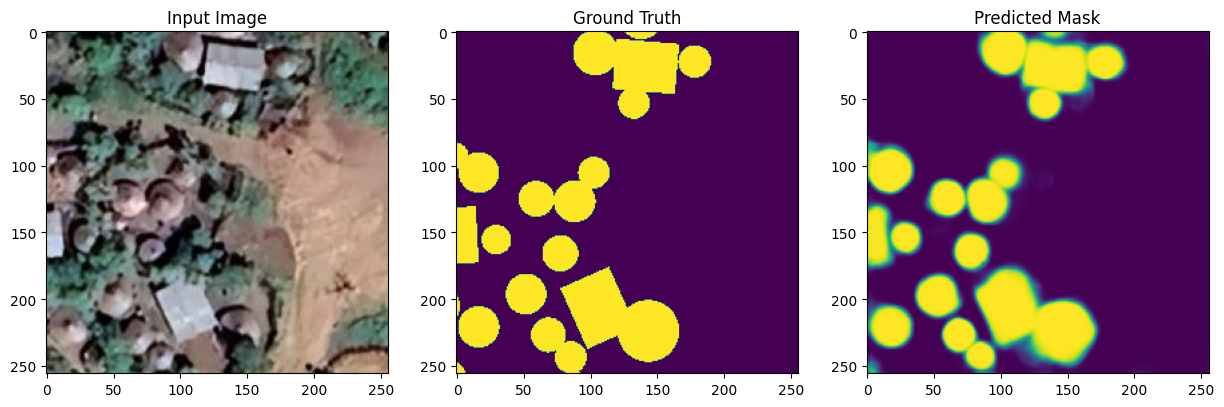

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a trained model and a dataset loaded

# Function to visualize a specific sample
def visualize_sample(model, XX_test, yy_test, i):
  """Visualizes a specific sample (identified by index) from the dataset.

  Args:
      model: The trained model for prediction.
      X_test: The testing data containing images.
      y_test: The ground truth masks for the testing data.
      i: The index of the specific sample to visualize.

  Raises:
      IndexError: If the provided index is out of range.
  """

  if i < 0 or i >= len(XX_test):
    raise IndexError("Invalid index. Please provide a valid index within the dataset range.")

  # Get the image and its ground truth
  image = XX_test[i]
  ground_truth = yy_test[i]

  # Make a prediction
  prediction = model.predict(np.expand_dims(image, axis=0))[0]

  # Plot the image, ground truth, and prediction
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  ax[0].imshow(image)
  ax[0].set_title('Input Image')

  ax[1].imshow(ground_truth)
  ax[1].set_title('Ground Truth')

  ax[2].imshow(prediction)
  ax[2].set_title('Predicted Mask')

  plt.show()

# Specify the index of the sample you want to visualize
i = 88  # Change this to the desired index

# Call the function to visualize the specified sample
visualize_sample(model, XX_test, yy_test, i)

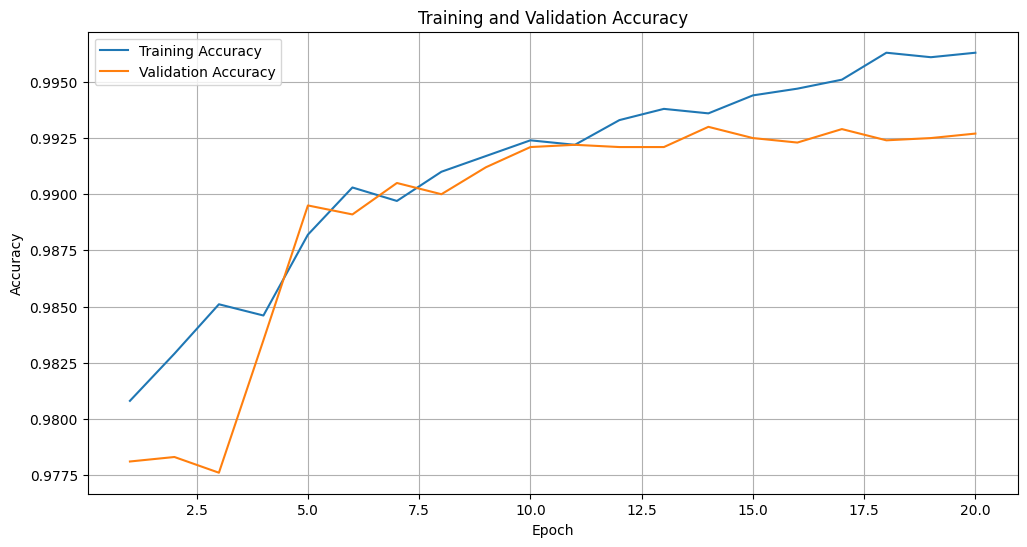

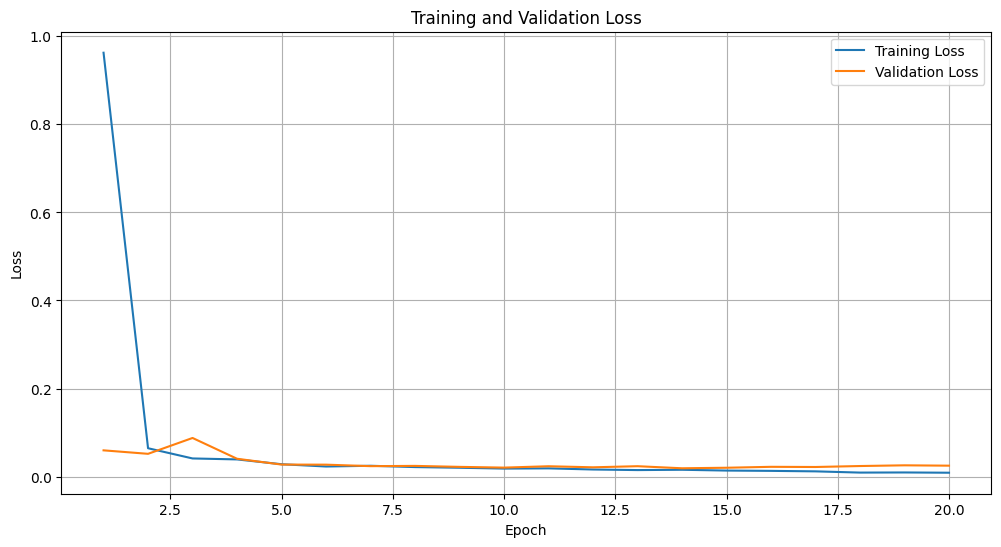

In [ ]:
import matplotlib.pyplot as plt

# Data from the training logs
epochs = range(1, 21)
train_acc = [0.9808, 0.9829, 0.9851, 0.9846, 0.9882, 0.9903, 0.9897, 0.9910, 0.9917, 0.9924, 0.9922, 0.9933, 0.9938, 0.9936, 0.9944, 0.9947, 0.9951, 0.9963, 0.9961, 0.9963]
val_acc = [0.9781, 0.9783, 0.9776, 0.9835, 0.9895, 0.9891, 0.9905, 0.9900, 0.9912, 0.9921, 0.9922, 0.9921, 0.9921, 0.9930, 0.9925, 0.9923, 0.9929, 0.9924, 0.9925, 0.9927]
train_loss = [0.9625, 0.0646, 0.0414, 0.0392, 0.0283, 0.0231, 0.0248, 0.0218, 0.0203, 0.0184, 0.0189, 0.0163, 0.0150, 0.0157, 0.0139, 0.0132, 0.0121, 0.0093, 0.0096, 0.0090]
val_loss = [0.0598, 0.0519, 0.0879, 0.0407, 0.0275, 0.0273, 0.0239, 0.0245, 0.0223, 0.0206, 0.0237, 0.0213, 0.0238, 0.0191, 0.0203, 0.0224, 0.0220, 0.0242, 0.0258, 0.0250]

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()